<a href="https://colab.research.google.com/github/yaameenc/World-Happiness-Report/blob/main/Copy_of_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas
!pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
uploaded = files.upload()

Saving 2019.csv to 2019.csv


In [4]:
import pandas as pd
import statsmodels.api as sm
from io import BytesIO

# Load the dataset
data = pd.read_csv(BytesIO(uploaded['2019.csv']))

# Select predictors and dependent variable
predictors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
dependent_variable = 'Score'

# Prepare the data
X = data[predictors]
y = data[dependent_variable]

# Add a constant for the regression model
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.40e-46
Time:                        13:11:50   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

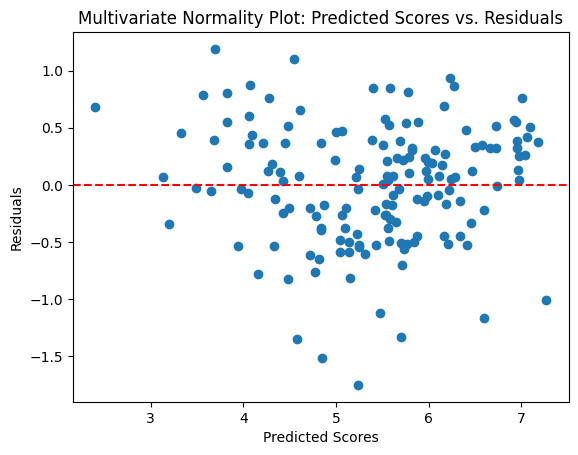

In [5]:
import matplotlib.pyplot as plt

# Calculate the predicted scores and residuals
predicted_scores = model.predict(X)
residuals = y - predicted_scores

# Create the scatter plot
plt.scatter(predicted_scores, residuals)
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Multivariate Normality Plot: Predicted Scores vs. Residuals')

# Add a horizontal line at y=0 to show the mean residual
plt.axhline(y=0, color='r', linestyle='--')

# Show the plot
plt.show()


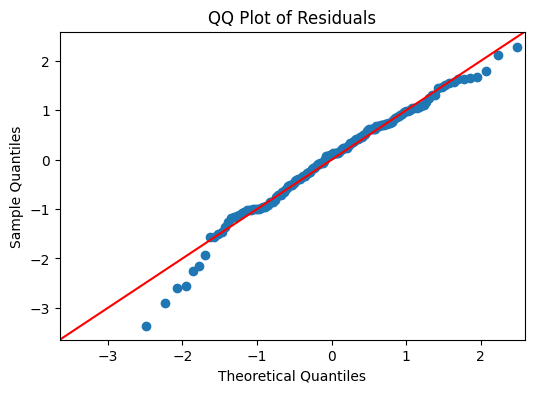

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Calculate the residuals
predicted_scores = model.predict(X)
residuals = y - predicted_scores

# Create the QQ plot
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='45', fit=True, ax=ax)

# Set the title and show the plot
ax.set_title('QQ Plot of Residuals')
plt.show()
